In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
import numpy as np

In [2]:
def euler_integrate_1d(field, initial_state, t_span = [0,1], delta_t = 0.01, args=()):
    nb_time_steps = int( (t_span[1]-t_span[0])/delta_t+1) 
    times = [ t_span[0] + k*delta_t for k in range(nb_time_steps) ]
    states = [initial_state]
    for time_step in range(nb_time_steps-1):
        t = times[time_step]
        actual_state = states[time_step]
        new_state = actual_state + delta_t * field(t, actual_state, *args)
        states.append(new_state)
    return times, states

def affine_field(t,x,a=1,b=1):
    return a*x+b

def linear_field(t,x,a=1):
    return a*x



### Modèle de décroissance exponentielle

Exemple du la désintégration $\alpha$:
* $x(t) = $ proportion de noyaux atomiques avec $N$ neutrons et $Z$ protons au temps $t$
* $x(0)-x(t) = $ proportion de noyaux avec $N-2$ neutrons et $Z-2$ protons au temps $t$
* $\tau = $ durée de vie moyenne d'un noyau avec $N$ neutrons et $Z$ protons 

EDO:
\begin{equation}\frac{dx(t)}{dt}=-\frac{1}{\tau} x(t)\end{equation}

Solution analytique:
\begin{equation}x(t)=x(0)e^{-t/\tau}\end{equation}

La demi-vie $t_{1/2}$ correspond à la condition 
\begin{equation}\frac{1}{2}=\frac{x(t_{1/2})}{x(0)}=e^{-t_{1/2}/\tau},\end{equation}
et donc 
\begin{equation}t_{1/2} = \tau\ln 2.\end{equation}


In [3]:
def exp_decay(t, x, tau=1):
    return -x/tau

Comparaison des solutions numériques et analytiques

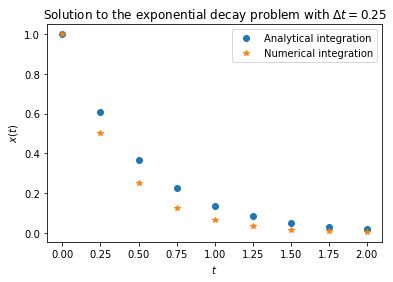

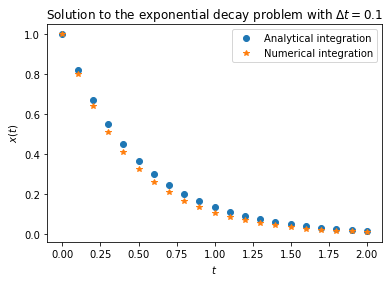

In [71]:
# Numerical solution
tau = 0.5
x_0 = 1

dt = 0.25
t,x = euler_integrate_1d(exp_decay, x_0, t_span = [0,2], delta_t = dt, args = (tau,))

exp_soln = [math.exp(-t_i/tau) for t_i in t]

plt.plot(t,exp_soln, 'o')
plt.plot(t,x,'*')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend(['Analytical integration', 'Numerical integration'])
plt.title('Solution to the exponential decay problem with $\Delta t = 0.25$')
plt.show()


dt = 0.1
t,x = euler_integrate_1d(exp_decay, x_0, t_span = [0,2], delta_t = dt, args = (tau,))

exp_soln = [math.exp(-t_i/tau) for t_i in t]

plt.plot(t,exp_soln, 'o')
plt.plot(t,x,'*')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend(['Analytical integration', 'Numerical integration'])
plt.title('Solution to the exponential decay problem with $\Delta t = 0.1$')
plt.show()


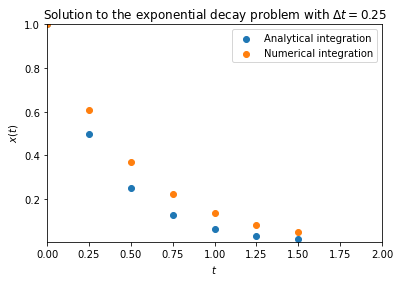

In [73]:
dt = 0.25
t,x = euler_integrate_1d(exp_decay, x_0, t_span = [0,2], delta_t = dt, args = (tau,))

exp_soln = [math.exp(-t_i/tau) for t_i in t]


fig, ax = plt.subplots()
ax.set_xlim([min(t),max(t)])
ax.set_ylim([min(x),max(x)])
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
scat1 = ax.scatter(t[0], exp_soln[0])
scat2 = ax.scatter(t[0],x[0])
plt.legend(['Analytical integration', 'Numerical integration'])
plt.title('Solution to the exponential decay problem with $\Delta t = %1.2f$' %dt)

def animate(i):
    data1 = np.stack([np.array(t[:i]), np.array(x[:i])]).T
    scat1.set_offsets(data1)
    data2 = np.stack([np.array(t[:i]), np.array(exp_soln[:i])]).T
    scat2.set_offsets(data2)
    return (scat1,scat2)

anim = animation.FuncAnimation(fig, animate, repeat=True, frames=len(t)-1)

rc('animation', html='html5')
anim.save('figures/exponential_decay%1.2f.gif'%dt, fps=4, dpi=300)
anim

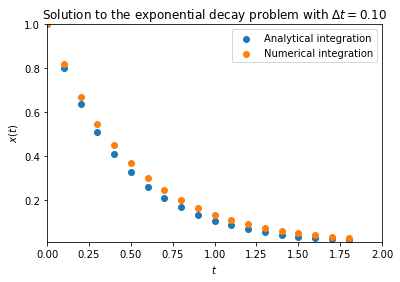

In [74]:
dt = 0.1

t,x = euler_integrate_1d(exp_decay, x_0, t_span = [0,2], delta_t = dt, args = (tau,))

exp_soln = [math.exp(-t_i/tau) for t_i in t]


fig, ax = plt.subplots()
ax.set_xlim([min(t),max(t)])
ax.set_ylim([min(x),max(x)])
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
scat1 = ax.scatter(t[0], exp_soln[0])
scat2 = ax.scatter(t[0],x[0])
plt.legend(['Analytical integration', 'Numerical integration'])
plt.title('Solution to the exponential decay problem with $\Delta t = %1.2f$'%dt)

def animate(i):
    data1 = np.stack([np.array(t[:i]), np.array(x[:i])]).T
    scat1.set_offsets(data1)
    data2 = np.stack([np.array(t[:i]), np.array(exp_soln[:i])]).T
    scat2.set_offsets(data2)
    return (scat1,scat2)

anim = animation.FuncAnimation(fig, animate, repeat=True, frames=len(t)-1)

rc('animation', html='html5')
anim.save('figures/exponential_decay%1.2f.gif'%dt, fps=4, dpi=300)
anim

>**Deuxième concept fondamental : point d'équilibe** <br />
> * L'état $x^*$ est un point d'équilibre (ou point fixe) du système autonome $\dot x = f(x)$ ssi 
\begin{equation}
f(x^*)=0.
\end{equation}
> * L'état d'équilibre $x^*$ est stable si
\begin{equation}
\frac{df(x^*)}{dx}<0.
\end{equation}
> * L'état d'équilibre $x^*$ est stable si
\begin{equation}
\frac{df(x^*)}{dx}>0.
\end{equation}



Par exemple, le modèle de décroissance exponentielle a un seul point d'équilibre, $x^*=0$, lequel est stable, ce qui se confirme aisément par simulation numérique.

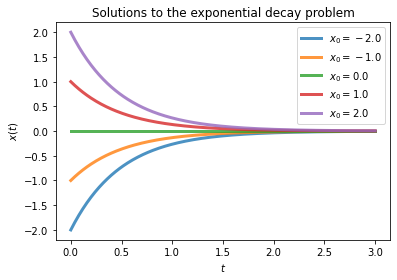

In [5]:
# Numerical solution for positive and negative initial conditions
legend = []
for x_0 in [-2,-1,0,1,2]:
    t,x = euler_integrate_1d(exp_decay, x_0, t_span = [0,3], delta_t = 0.01, args = (tau,))
    plt.plot(t,x, '', alpha=0.8, linewidth=3)
    legend.append('$x_0=%1.1f$' %x_0)
    
plt.xlabel('$t$')
plt.ylabel('$x(t)$')    
plt.legend(legend)
plt.title('Solutions to the exponential decay problem')
plt.show()

### Modèle de Malthus: croissance exponentielle

Selon ce modèle, la taille de la population à l'instant $t$, $x(t)$, varie selon l'EDO
\begin{equation}\frac{dx(t)}{dt}= r x(t),\qquad r>0\end{equation}
Il y a donc un seul point d'équilibre, $x^*=0$, lequel est instable. 


In [6]:
def exp_growth(t, x, r=1):
    return r*x

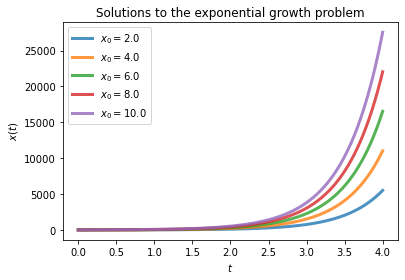

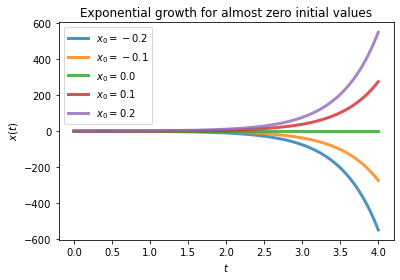

In [7]:
# Numerical solution for five positive initial conditions
r = 2.0
initial_states = [2, 4, 6, 8, 10]
legend = []
for x_0 in initial_states:
    t,x = euler_integrate_1d(exp_growth, x_0, t_span = [0,4], delta_t = 0.01, args = (r,))
    plt.plot(t,x, '', alpha=0.8, linewidth=3)
    legend.append('$x_0=%1.1f$' %x_0)
    
plt.xlabel('$t$')
plt.ylabel('$x(t)$')    
plt.legend(legend)
plt.title('Solutions to the exponential growth problem')
plt.show()


# Numerical solution for five initial conditions near zero
r = 2.0
initial_states = [-0.2, -0.1, 0.0, 0.1, 0.2]
legend = []
for x_0 in initial_states:
    t,x = euler_integrate_1d(exp_growth, x_0, t_span = [0,4], delta_t = 0.01, args = (r,))
    plt.plot(t,x, '', alpha=0.8, linewidth=3)
    legend.append('$x_0=%1.1f$' %x_0)
    
plt.xlabel('$t$')
plt.ylabel('$x(t)$')    
plt.legend(legend)
plt.title('Exponential growth for almost zero initial values')
plt.show()

### Dynamique non linéaire simple : Modèle de Verhulst

Ce modèle décrit le taux de variation de la taille d'une population à l'instant $t$, $x(t)\geq 0$, en fonction du taux d'accoissement naturel, $r>0$, et de la capapité d'accueil (capacité porteuse), $K>0$:
\begin{equation}
    \frac{dx(t)}{dt}= r\,x(t)\left(1-\frac{1}{K}x(t)\right).
\end{equation}
En notation plus compacte,
\begin{equation}
    \dot x= f(x),\qquad f(x)= r\,x\left(1-\frac{1}{K}x\right).
\end{equation}
La solution analystique est connue; il d'agit d'une fonction logistique. 

    
Il y a deux points d'équilibre: $x^*=0$ et $x^*=K$. Le premier est instable tandis que le second est stable si $K<2$ et instable autrement. En effet,
\begin{equation}
    f'(x)=r\left(1-\frac{2}{K}x\right)\quad\Longrightarrow\quad f'(0)=r>0,\quad f'(K)=-r<0.
 \end{equation}


In [8]:
def Verhulst(t, x, r=1, K=1):
    """
    Taux de variation de la taille d'une population, x, en fonction du taux d'accoissement naturel, r, 
    et de la capapité d'accueil (capacité porteuse), K
    """
    return r*x*(1-x/K)

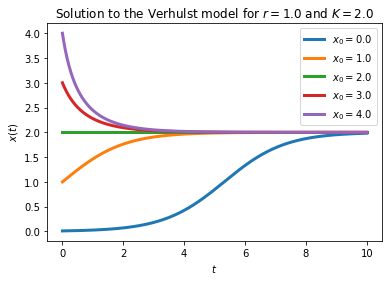

In [9]:
r, K = 1, 2
initial_states = [0.01, 1, 2, 3, 4]

legend = []
for x_0 in initial_states:
    t,x = euler_integrate_1d(Verhulst, x_0, t_span = [0,10], delta_t = 0.01, args = (r,K))
    plt.plot(t,x, '', linewidth=3)
    legend.append('$x_0 = %1.1f$ ' %(x_0))

plt.xlabel('$t$')
plt.ylabel('$x(t)$')
plt.legend(legend)
plt.title('Solution to the Verhulst model for $r=%1.1f$ and $K=%1.1f$' %(r,K))
plt.show()

### Dynamique non linéaire riche : modèle neuronal continu

* $x(t)=$ activité (taux de décharge) d'un neurone à l'instant $t$
* $s(x)=\sigma(a(x-b))=$ fonction d'activation du neurone où
\begin{equation}
    \sigma(x)=\frac{1}{1+e^{-x}}
\end{equation}
est la fonction logistique (sigmoïde) tandis que $a,b>0$.
* L'évolution de l'actvité neuronal est régie par l'EDO
\begin{equation}
    \dot x= f(x),\qquad f(x)= -x + s(x).
\end{equation}


* Selon les valeurs des paramètres $a$ et $b$, il peut y avoir 1,2, ou 3 états d'équilibre. Il n'y a pas de formule analytique pour ces états.


In [76]:
def activation(x, a, b):
    return 1.0/(1+math.exp(-a*(x-b)))

def neuron(t, x, a=1, b=2):
    return -x + activation(x, a, b)

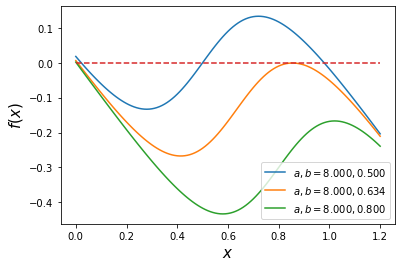

In [77]:
range_a = [8]
range_b = [0.5,0.634,0.8]
x_range = [i/100 for i in range(121)]
legend = []
for a in range_a:
    for b in range_b:
        y_range = [neuron(0,x,a,b) for x in x_range]
        plt.plot(x_range, y_range)
        legend.append('$a, b =%1.3f, %1.3f$' %(a,b))
plt.plot(x_range, [0 for i in range(121)],'--')
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$f(x)$', fontsize=15)
plt.legend(legend)
plt.show()

### Méthode itérative de Newton-Raphson:
\begin{equation}
    x_{n+1}=x_{n}-\frac{f(x_{n})}{f'(x_{n})}
\end{equation}

<div>
    <img src=https://upload.wikimedia.org/wikipedia/commons/f/f0/Newton_iteration.png width = "400">
</div>

<img src=https://upload.wikimedia.org/wikipedia/commons/f/f0/Newton_iteration.png  width="10">

In [118]:
def NewtonRaphson(f, df, x_0, max_itr = 100, tol=1e-6, args = ()):
    """
    Use the Newton-Raphson method to find a root of f 
    """
    x = x_0
    for i in range(max_itr):
        x = x - f(x,*args)/df(x,*args)
        if abs(f(x, *args)) < tol:
            break
    return x, f(x,*args), i

In [120]:
f = lambda x, a, b: -x + activation(x, a, b)
df = lambda x, a, b: -1 +a*activation(x, a, b)*(1-activation(x, a, b))

a = 8
b = 0.5

initial_points = [0.0, 0.5, 1.1]
for x0 in initial_points:
    soln, error, nb_iter = NewtonRaphson(f, df, x0, max_itr = 100, tol=1e-12, args = (a,b))
    print('Zero found at %1.3f using %i iterations with error %1.2E' %(soln, nb_iter, error))

Zero found at 0.021 using 2 iterations with error 3.09E-15
Zero found at 0.500 using 0 iterations with error 0.00E+00
Zero found at 0.979 using 3 iterations with error 1.11E-16


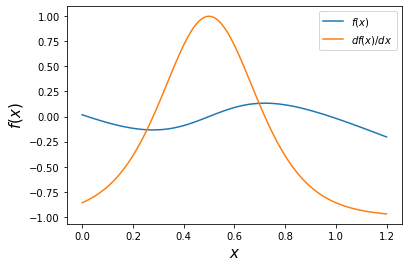

In [92]:
a = 8
b = 0.5
x_range = [i/100 for i in range(121)]
f_range = [f(x,a,b) for x in x_range]
df_range = [df(x,a,b) for x in x_range]
plt.plot(x_range, f_range)
plt.plot(x_range, df_range)
plt.xlabel('$x$', fontsize=15)
plt.ylabel('$f(x)$', fontsize=15)
plt.legend(['$f(x)$', '$df(x)/dx$'])
plt.show()

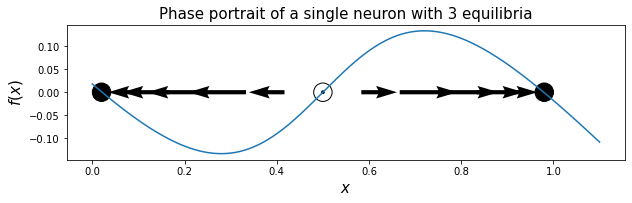

In [126]:
a=8
b=0.5

# Phase portrait figure
## Activation function
fig,ax = plt.subplots(figsize=(10,5))
x_range = [i/100 for i in range(111)]
y_range = [neuron(0,x,a,b) for x in x_range]
ax.plot(x_range, y_range)

##Arrows indicading direction of flow
n = 12
x_quiver = [i/n for i in range(n+1)]
y_quiver = [0 for i in range(n+1)]
field_value_x = [neuron(0,x,a,b) for x in x_quiver]
ax.quiver(x_quiver, y_quiver, field_value_x, y_quiver, angles='xy', scale_units='xy', scale=1.0)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$f(x)$', fontsize=15)

## Zeros of the activation function as circles
circle0 = plt.Circle((0.02,0), 0.02, color='k', fill=True)
circle1 = plt.Circle((0.5,0), 0.02, color='k', fill=False)
circle2 = plt.Circle((0.98,0), 0.02, color='k', fill=True)
ax.add_patch(circle0)
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.set_aspect('equal')
ax.set_title('Phase portrait of a single neuron with 3 equilibria',fontsize=15)
plt.show()

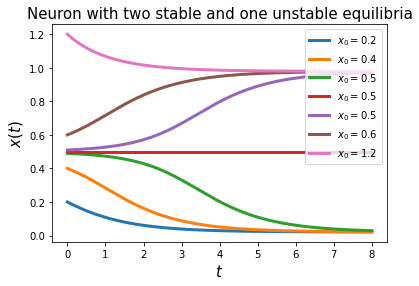

In [13]:
a = 8
b = 0.5
initial_states = [0.2, 0.4, 0.49,0.5,0.51,0.6,1.2]

legend = []
for x_0 in initial_states:
    t,x = euler_integrate_1d(neuron, x_0, t_span = [0,8], delta_t = 0.01, args = (a,b))
    plt.plot(t,x, '', linewidth=3)
    legend.append('$x_0 = %1.1f$ ' %(x_0))

plt.xlabel('$t$', fontsize=15)
plt.ylabel('$x(t)$', fontsize=15)
plt.title('Neuron with two stable and one unstable equilibria', fontsize=15)
plt.legend(legend)
plt.show()

In [127]:
def neuron_with_input(t, x, a=1, b=2, c=0.2):
    return -x + activation(x, a, b-c*math.sin(5*t))

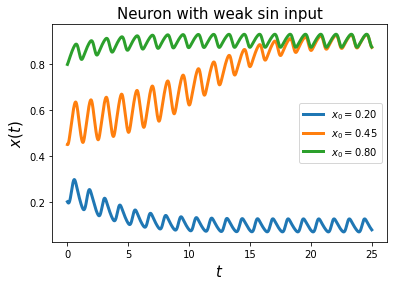

In [128]:
a = 8
b = 0.5
c = 0.3
initial_states = [0.2, 0.45, 0.8]

legend = []
for x_0 in initial_states:
    t,x = euler_integrate_1d(neuron_with_input, x_0, t_span = [0,25], delta_t = 0.001, args = (a,b,c))
    plt.plot(t,x, '', linewidth=3)
    legend.append('$x_0 = %1.2f$ ' %(x_0))

plt.xlabel('$t$', fontsize=15)
plt.ylabel('$x(t)$', fontsize=15)
plt.title('Neuron with weak sin input', fontsize=15)
plt.legend(legend)
plt.show()

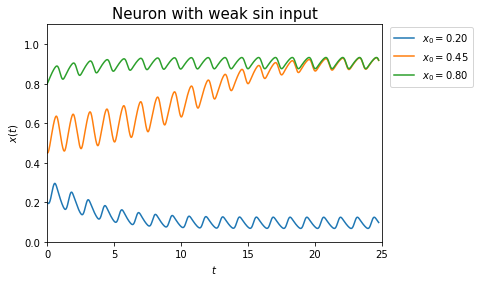

In [151]:
a = 8
b = 0.5
c = 0.3
dt = 0.01

t,x1 = euler_integrate_1d(neuron_with_input, 0.2, t_span = [0,25], delta_t = dt, args = (a,b,c))
t,x2 = euler_integrate_1d(neuron_with_input, 0.45, t_span = [0,25], delta_t = dt, args = (a,b,c))
t,x3 = euler_integrate_1d(neuron_with_input, 0.8, t_span = [0,25], delta_t = dt, args = (a,b,c))

fig, ax = plt.subplots()
ax.set_xlim([min(t),max(t)])
ax.set_ylim([0,1.1])
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
curve1, = ax.plot(t[:2], x1[:2])
curve2, = ax.plot(t[:2], x2[:2])
curve3, = ax.plot(t[:2], x3[:2])
plt.legend(['$x_0=0.20$', '$x_0=0.45$', '$x_0=0.80$'],bbox_to_anchor=(1.01, 1.01))
plt.title('Neuron with weak sin input', fontsize=15)

def animate(i):
    curve1.set_xdata(t[:i])
    curve1.set_ydata(x1[:i])
    curve2.set_xdata(t[:i])
    curve2.set_ydata(x2[:i])
    curve3.set_xdata(t[:i])
    curve3.set_ydata(x3[:i])
    return (curve1,curve2,curve3)

anim = animation.FuncAnimation(fig, animate, repeat=True, frames=range(1,len(t)-1,25))

rc('animation', html='html5')
anim.save('figures/neuronal_activity_weak_input.gif', fps=10, dpi=300)
anim

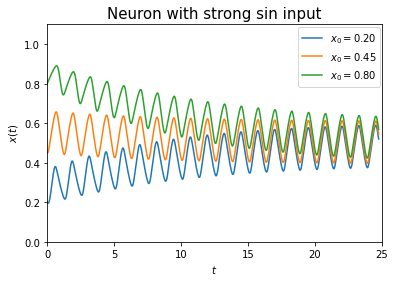

In [152]:
a = 8
b = 0.5
c = 0.4
dt = 0.01

t,x1 = euler_integrate_1d(neuron_with_input, 0.2, t_span = [0,25], delta_t = dt, args = (a,b,c))
t,x2 = euler_integrate_1d(neuron_with_input, 0.45, t_span = [0,25], delta_t = dt, args = (a,b,c))
t,x3 = euler_integrate_1d(neuron_with_input, 0.8, t_span = [0,25], delta_t = dt, args = (a,b,c))

fig, ax = plt.subplots()
ax.set_xlim([min(t),max(t)])
ax.set_ylim([0,1.1])
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
curve1, = ax.plot(t[:2], x1[:2])
curve2, = ax.plot(t[:2], x2[:2])
curve3, = ax.plot(t[:2], x3[:2])
plt.legend(['$x_0=0.20$', '$x_0=0.45$', '$x_0=0.80$'],bbox_to_anchor=(1.01, 1.01))
plt.title('Neuron with strong sin input', fontsize=15)

def animate(i):
    curve1.set_xdata(t[:i])
    curve1.set_ydata(x1[:i])
    curve2.set_xdata(t[:i])
    curve2.set_ydata(x2[:i])
    curve3.set_xdata(t[:i])
    curve3.set_ydata(x3[:i])
    return (curve1,curve2,curve3)

anim = animation.FuncAnimation(fig, animate, repeat=True, frames=range(1,len(t)-1,25))

rc('animation', html='html5')
anim.save('figures/neuronal_activity_strong_input.gif', fps=10, dpi=300)
anim

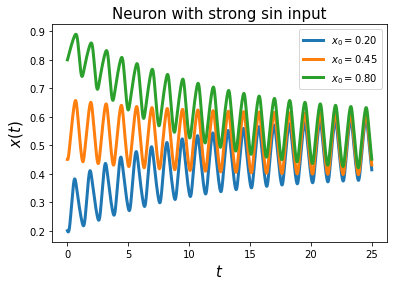

In [16]:
a = 8
b = 0.5
c = 0.4
initial_states = [0.2, 0.45, 0.8]

legend = []
for x_0 in initial_states:
    t,x = euler_integrate_1d(neuron_with_input, x_0, t_span = [0,25], delta_t = 0.001, args = (a,b,c))
    plt.plot(t,x, '', linewidth=3)
    legend.append('$x_0 = %1.2f$ ' %(x_0))

plt.xlabel('$t$', fontsize=15)
plt.ylabel('$x(t)$', fontsize=15)
plt.title('Neuron with strong sin input', fontsize=15)
plt.legend(legend)
plt.show()

# Systèmes à deux dimensions

## Systèmes linéaires

Exemple classique: système masse-ressort avec amortissement dont l'EDO du deuxièmes ordre est
\begin{equation}
    m\,\ddot{x} + c\,\dot{x}+k\,x=0
\end{equation}
où $m>0$, $c\geq 0$ et $k\geq 0$ désignent respectivement la masse, la constante d'amortissement et la raideur du ressort. Si on pose $v=\dot{x}$, alors on obtient 2 EDO d'ordre 1:
\begin{equation}
    \dot{x} = v,\qquad \dot{v}=- \frac{k}{m}\,x-\frac{c}{m}\,v 
\end{equation}


> <span style="color:blue"> **Principe de base pour les systèmes à $n>1$ dimensions: vectoriser !**</span> <br />
> * Vectoriser signifie écrire toute expression mathématique sous forme de vecteurs et de matrices. <br />
\begin{equation}
    \underbrace{\dot{\mathbf{x}}}_{n\times 1} = \underbrace{\mathbf{f}}_{n\times 1}(t, \underbrace{\mathbf{x}}_{n\times 1},\underbrace{W}_{n\times n},\underbrace{\mathbf{a}}_{n\times 1},\ldots)
\end{equation}
> * En Python, vectoriser signifie que toutes les variables et paramètres devraient être incluses dans des np.array et que toutes les fonctions devraient être définies à l'aide des opérations de base de NumPy.

</span> <br />
Pour le système masse-ressort amorti, la vectorisation donne:
\begin{equation}
    \dot{\mathbf{x}} = A \,\mathbf{x},\qquad 
    \mathbf{x}= \begin{pmatrix} x\\v \end{pmatrix},\qquad 
    W = \begin{pmatrix}0& 1\\ -\omega^2 & -2\zeta\omega\end{pmatrix}.
\end{equation}
où ${\displaystyle \omega ={\sqrt {\frac {k}{m}}}} $ est la pulsation propre de l'oscillateur harmonique et ${\displaystyle \zeta ={\frac {c}{2{\sqrt {km}}}}} $ est le taux d'amortissement.

</span> <br />
La solution analytique d'un système linéaire $\dot{\mathbf{x}} = A \,\mathbf{x}$ est connue:
\begin{equation}
    \mathbf{x}(t) = \exp(tA) \,\mathbf{x}(0),\qquad \exp(tA) = I+tA+\frac{t^2}{2!}A^2+\frac{t^3}{3!}A^3+\ldots
\end{equation}
Si $A$ est diagonalisable, c.-à-d.
\begin{equation}
    A = PDP^{-1}, \qquad D=\mathrm{diag}(\lambda_1,\ldots,\lambda_n),\qquad PP^{-1}=P^{-1}P=I,
\end{equation}
alors 
\begin{equation}
    \exp(tA)=P D_t P^{-1},\qquad D_t=\mathrm{diag}(e^{t\lambda_1},\ldots,e^{t\lambda_n})
\end{equation}
et la solution du système linéaire s'écrit aisément à l'aide de produit matriciel:
\begin{equation}
    \mathbf{x}(t) = P D_t P^{-1}\,\mathbf{x}(0)
\end{equation}

</span> <br />
Tout système linéaire $\dot{\mathbf{x}} = A \,\mathbf{x}$ possède un et un seul point d'équilibre $\mathbf{x}^*=\mathbf{0}$, lequel est **stable si les valeurs propres de $A$ ont une partie réelle négative**.

In [192]:
import numpy as np

linsys = lambda t, x, A: np.dot(A, x) # vector field, @ is a short cut for np.matmul and related to np.dot 

def euler_integrate(vector_field, initial_state, t_span = [0,4], delta_t = 0.01, args=None):
    N = len(initial_state) # system's dimension
    times = np.arange(t_span[0], t_span[1]+delta_t, delta_t) #other option np.linspace(t_span[0], t_span[1], int( (t_span[1]-t_span[0])/delta_t+1) )
    T = len(times) # number of time steps
    states = np.zeros((N,T))
    states[:,0] = initial_state.flatten()
    for step in range(T-1):
        current_state = states[:,step].reshape(N,1)
        vector_field_current_state = vector_field( step, current_state,*args)
        states[:,step+1] = states[:,step] + delta_t*vector_field_current_state.flatten()
    return times, states

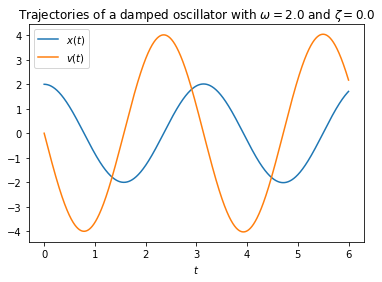

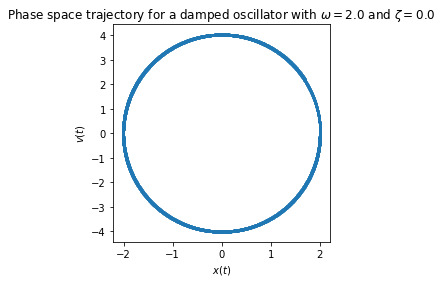

Eigenvalues of A: [ 0.+2.j -0.-2.j]


In [193]:
omega = 2.0
zeta = 0.0
A = np.array([[0,1],
              [-omega**2,-2*omega*zeta]])

x_0 = np.array([[2],
                [0]])#np.random.rand(2,)

t,x = euler_integrate(linsys, x_0, t_span = [0,6], delta_t = 0.001, args = (A,))# Try delta_t=0.01 !

plt.plot(t,x.T)
plt.title('Trajectories of a damped oscillator with $\omega=%1.1f$ and $\zeta=%1.1f$' %(omega,zeta))
plt.legend(['$x(t)$','$v(t)$'])
plt.xlabel('$t$')
plt.show()

plt.axes().set_aspect(0.5)
plt.scatter(x[0,:],x[1,:], marker='o',s=4, alpha=0.5)
plt.title('Phase space trajectory for a damped oscillator with $\omega=%1.1f$ and $\zeta=%1.1f$' %(omega,zeta))
plt.xlabel('$x(t)$')
plt.ylabel('$v(t)$')
plt.show()


eigvals = np.linalg.eigvals(A)
print('Eigenvalues of A: {}'.format(eigvals))

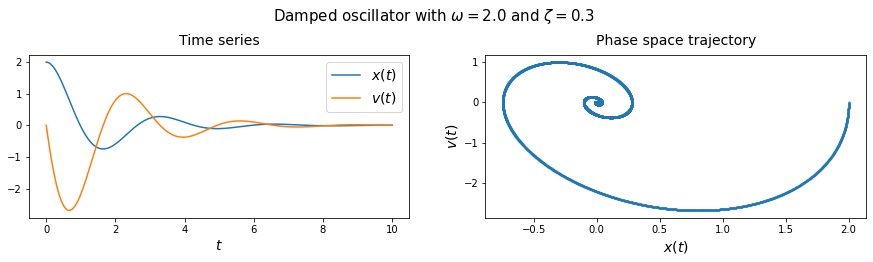

Eigenvalues of A: [-0.6+1.91j -0.6-1.91j]
Real part of the eigenvalues of A: [-0.6 -0.6]


In [196]:
omega = 2.0
zeta = 0.3
A = np.array([[0,1],
              [-omega**2,-2*omega*zeta]])

x_0 = np.array([[2],
                [0]])#np.random.rand(2,)

t,x = euler_integrate(linsys, x_0, t_span = [0,10], delta_t = 0.001, args = (A,))


fig, axs = plt.subplots(1,2, figsize=(15,3))
fig.suptitle('Damped oscillator with $\omega=%1.1f$ and $\zeta=%1.1f$' %(omega,zeta), y=1.1, fontsize=15)

axs[0].plot(t,x.T)
axs[0].set_title('Time series', pad=10, fontsize=14)
axs[0].legend(['$x(t)$','$v(t)$'],fontsize=14)
axs[0].set_xlabel('$t$',fontsize=14)


axs[1].scatter(x[0,:],x[1,:], marker='.',s=8, alpha=0.5)
axs[1].set_title('Phase space trajectory', pad=10, fontsize=14)
axs[1].set_xlabel('$x(t)$',fontsize=14)
axs[1].set_ylabel('$v(t)$',fontsize=14)


plt.show()

eigvals = np.linalg.eigvals(A)
realpart = np.real(eigvals)
print('Eigenvalues of A: '+ np.array2string(eigvals, precision=2))
print('Real part of the eigenvalues of A: '+ np.array2string(realpart, precision=2))

In [194]:
def phase_portrait(vector_field, x_span, y_span, points_per_axis = 20, args = None):
    """
    Split a 2d region into a square grid and evaluate a vector field on that grid.
    
    Arguments
    ---------
    vector_field     numpy function with arguments t, x, *args where x is a 2d vector
    x_span           list of the form [x_min, x_max]
    y_span           list of the form [y_min, y_max] 
    points_per_axis  int, number of points per axis
    args             tuple of arguments transfered to vector_field
    
    Returns
    -------
    X                2d np.array whose element (i,j) gives the x-value of grid cell (i,j)  
    Y                2d np.array whose element (i,j) gives the y-value of grid cell (i,j)
    U                2d np.array whose element (i,j) gives the x-value of the vector field at grid cell (i,j)  
    V                2d np.array whose element (i,j) gives the y-value of the vector field at grid cell (i,j)
    Norm             2d np.array whose element (i,j) gives the norm of the vector field at grid cell (i,j)
    """
    n = int(points_per_axis)
    x_range = np.linspace(x_span[0],x_span[1], n)
    y_range = np.linspace(y_span[0],y_span[1], n)
    X, Y = np.meshgrid(x_range, y_range)
    U = np.zeros((n,n)) # will give the vector field x-component on the grid
    V = np.zeros((n,n)) # will give the vector field y-component on the grid
    for i in range(n):
        for j in range(n):
            vecposition = np.array([[X[i,j]],[Y[i,j]]])
            vecfield = vector_field([], vecposition, *args)
            U[i,j] = vecfield[0]
            V[i,j] = vecfield[1]

    Norm = np.sqrt(U**2 + V**2)
    
    return X, Y, U, V, Norm

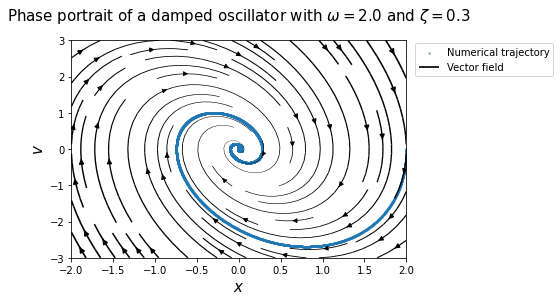

In [197]:
X, Y, U, V, N = phase_portrait(linsys, [-2,2], [-3,3], points_per_axis = 40, args = (A,))

fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x[0,:],x[1,:], marker='.',s=8, alpha=0.5)
ax.streamplot(X, Y, U, V, density=0.8, color='k', linewidth=np.sqrt(N)/2)
ax.legend(['Numerical trajectory', 'Vector field'], bbox_to_anchor=(1.01, 1.01))
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$v$', fontsize=15)
ax.set_title('Phase portrait of a damped oscillator with $\omega=%1.1f$ and $\zeta=%1.1f$' %(omega,zeta), fontsize=15, pad=20)
plt.show()

Modèle de Lotka–Volterra:
* Généralisation du modèle de Verhulst.
* $x(t)$ est l'effectif des proies à l'instant $t$.
* $y(t)$ est l'effectif des prédateurs à l'instant $t$.
* La dynamique est régie par l'EDO
\begin{aligned}
    {\frac {dx}{dt}}&=\alpha x-\beta xy,\\{\frac {dy}{dt}}&=\delta xy-\gamma y.
\end{aligned}
* $\alpha=$ taux de reproduction intrinsèque des proies (constant, indépendant du nombre de prédateurs)
* $\beta=$  taux de mortalité des proies dû aux prédateurs rencontrés
* $\delta=$  taux de reproduction des prédateurs en fonction des proies rencontrées et mangées 
* $\gamma=$  taux de mortalité intrinsèque des prédateurs (constant, indépendant du nombre de proies) 
* Forme vectorisée:
\begin{equation}
    \dot{\mathbf{x}} = \mathbf{x}\circ\left(\mathbf{a} + W\mathbf{x}\right),\qquad\mathbf{x} = \begin{pmatrix}x\\y\end{pmatrix},\quad 
    W = \begin{pmatrix}0&-\beta\\\delta & 0\end{pmatrix},\quad 
    \mathbf{a}= \begin{pmatrix}\alpha\\-\gamma\end{pmatrix}
\end{equation}


In [181]:
LotkaVolterra = lambda t,x,a,W: np.multiply(x, a + np.dot(W,x))

In [184]:
LotkaVolterra([],x_0,*(a,W))

array([[-0.03630027],
       [-0.07615409]])

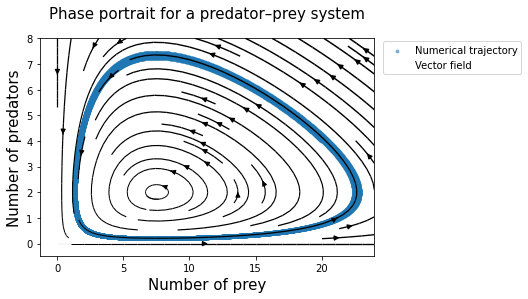

In [243]:
#alpha, beta, gamma, delta = [1,1,1,1]
lpha, beta, gamma, delta =[1., 0.5, 1.5, 0.2]
a = np.array([[alpha],
              [-gamma]])
W = np.array([[0,-beta],
              [delta,0]])
x_0 = np.array([[20],
               [4]])

dt = 0.001

t,x = euler_integrate(LotkaVolterra, x_0, t_span = [0,40], delta_t = dt, args = (a,W))

X, Y, U, V, N = phase_portrait(LotkaVolterra, [0,24], [0,8], points_per_axis = 40, args = (a,W))

fig = plt.figure()
ax = plt.subplot(111)
ax.scatter(x[0,:],x[1,:], marker='o',s=8, alpha=0.5)
ax.streamplot(X, Y, U, V, density=0.8, color='k', linewidth=N**(0.1))
ax.legend(['Numerical trajectory', 'Vector field'], bbox_to_anchor=(1.01, 1.01))
ax.set_xlabel('Number of prey', fontsize=15)
ax.set_ylabel('Number of predators', fontsize=15)
ax.set_title('Phase portrait for a predator–prey system', fontsize=15, pad=20)
plt.show()


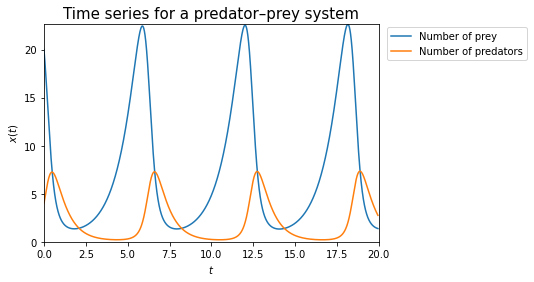

In [246]:
t,x = euler_integrate(LotkaVolterra, x_0, t_span = [0,20], delta_t = dt, args = (a,W))

fig, ax = plt.subplots()
ax.set_xlim([0,t.max()])
ax.set_ylim([0,x.max()])
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
curve1, = ax.plot(t[:2], x[0,:2])
curve2, = ax.plot(t[:2], x[1,:2])
plt.legend(['Number of prey','Number of predators'],bbox_to_anchor=(1.01, 1.01))
plt.title('Time series for a predator–prey system', fontsize=15)

def animate(i):
    curve1.set_xdata(t[:i])
    curve1.set_ydata(x[0,:i])
    curve2.set_xdata(t[:i])
    curve2.set_ydata(x[1,:i])
    return (curve1,curve2)

anim = animation.FuncAnimation(fig, animate, repeat=True, frames=range(1,len(t)-1,50))

rc('animation', html='html5')
anim.save('figures/predator_prey_system.gif', fps=20, dpi=300)
anim

In [420]:
neural_network = lambda t, x, A, b: -x + 8*sigmoid(np.dot(A,x)-b)
sigmoid = lambda x:  1/(1+np.exp(-x))

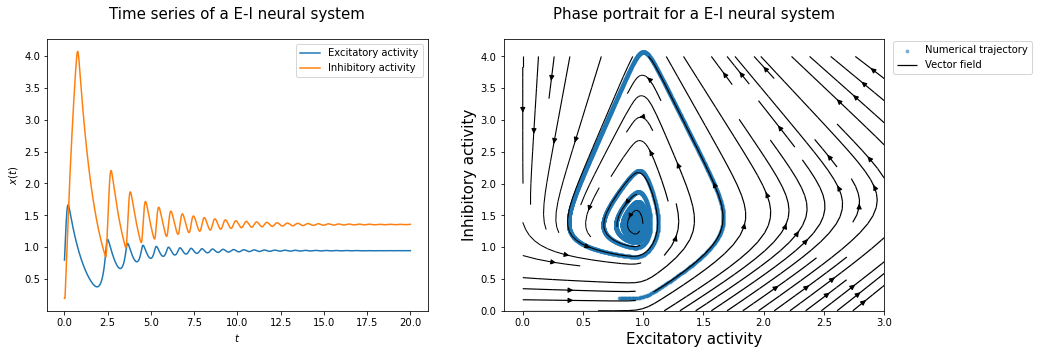

In [452]:
A = np.array([[1.5,-4],
             [30,0]])
b= np.array([[-2.0],
            [30.0]])
x_0=np.array([[0.8],
              [0.2]])
dt = 0.001

t,x = euler_integrate(neural_network, x_0, t_span = [0,20], delta_t = dt, args = (A,b))

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(t,x.T)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')
ax[0].legend(['Excitatory activity', 'Inhibitory activity'])#, bbox_to_anchor=(1.01, 1.01))
ax[0].set_title('Time series of a E-I neural system', fontsize=15, pad=20)

X, Y, U, V, N = phase_portrait(neural_network, [0,3], [0,4], points_per_axis = 40, args = (A,b))

ax[1].scatter(x[0,:],x[1,:], marker='o',s=8, alpha=0.5)
ax[1].streamplot(X, Y, U, V, density=0.8, color='k', linewidth=N**(0.1))
ax[1].legend(['Numerical trajectory', 'Vector field'], bbox_to_anchor=(1.01, 1.01))
ax[1].set_xlabel('Excitatory activity', fontsize=15)
ax[1].set_ylabel('Inhibitory activity', fontsize=15)
ax[1].set_title('Phase portrait for a E-I neural system', fontsize=15, pad=20)
plt.show()

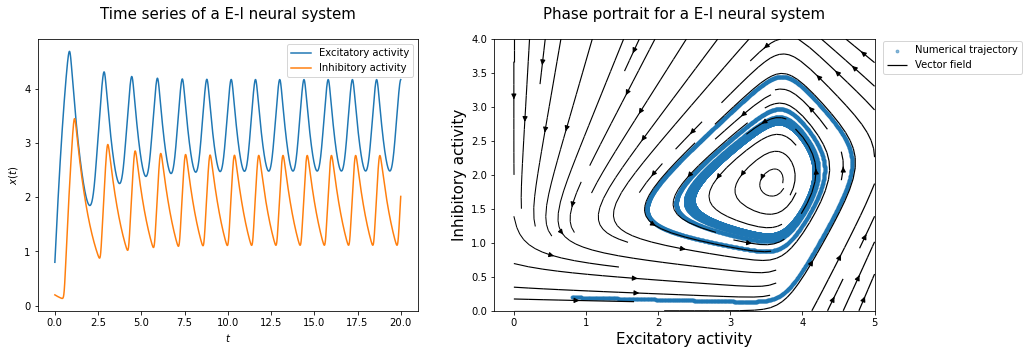

In [445]:
A = np.array([[1.5,-4],
             [8,0]])
b= np.array([[-2.0],
            [30.0]])
x_0=np.array([[0.8],
              [0.2]])
dt = 0.001

t,x = euler_integrate(neural_network, x_0, t_span = [0,20], delta_t = dt, args = (A,b))

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax[0].plot(t,x.T)
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$x(t)$')
ax[0].legend(['Excitatory activity', 'Inhibitory activity'])#, bbox_to_anchor=(1.01, 1.01))
ax[0].set_title('Time series of a E-I neural system', fontsize=15, pad=20)

X, Y, U, V, N = phase_portrait(neural_network, [0,5], [0,4], points_per_axis = 40, args = (A,b))

ax[1].scatter(x[0,:],x[1,:], marker='o',s=8, alpha=0.5)
ax[1].streamplot(X, Y, U, V, density=0.8, color='k', linewidth=N**(0.1))
ax[1].legend(['Numerical trajectory', 'Vector field'], bbox_to_anchor=(1.01, 1.01))
ax[1].set_xlabel('Excitatory activity', fontsize=15)
ax[1].set_ylabel('Inhibitory activity', fontsize=15)
ax[1].set_title('Phase portrait for a E-I neural system', fontsize=15, pad=20)
plt.show()

<ipython-input-420-a37c855e3b79>:2: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x:  1/(1+np.exp(-x))


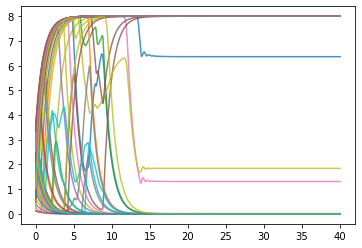

In [510]:
n = 80
x_0 = 4*np.random.rand(n,1)
A = 5*np.random.randn(n,n)
b = 1.0*np.random.rand(n,1)
dt = 0.001

t,x = euler_integrate(neural_network, x_0, t_span = [0,40], delta_t = dt, args = (A,b))

plt.plot(t,x.T, alpha = 0.8)
plt.show()

(100, 1)
(100, 100)
<class 'numpy.ndarray'>


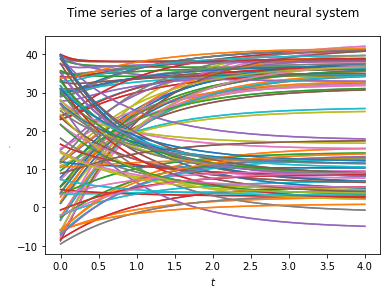

In [654]:
neural_network2 = lambda t, x, A, b: -x + 1.0*np.dot(A, sigmoid(x-b))

nx = 10
ny = 10
n = nx*ny
x_0 = 50.0*np.random.rand(n,1)-10
u = np.vstack((0.5*np.random.randn(int(n/2),1)+4, 0.5*np.random.randn(int(n/2),1)+1))
print(u.shape)
A = 1/np.sqrt(8*n)*u @ u.T
print(A.shape)
print(type(A))
b = 0.0*np.random.rand(n,1)
dt = 0.001

t,x = euler_integrate(neural_network2, x_0, t_span = [0,4], delta_t = dt, args = (A,b))

fig, ax = plt.subplots()
ax.plot(t,x.T)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=1)
ax.plot(t,x.T, alpha = 0.8)
ax.set_title('Time series of a large convergent neural system', fontsize=12, pad=20)
plt.show()

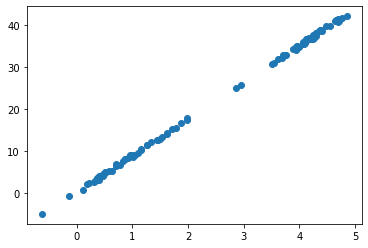

In [655]:
plt.scatter(u,x[:,-1])
plt.show()

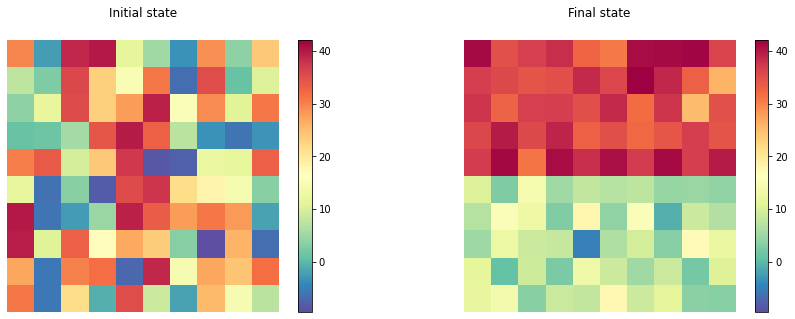

In [658]:
T = len(t)
X = x.reshape(nx,ny,T)
Xmin = X.min()
Xmax = X.max()

fig, ax = plt.subplots(1,2,figsize=(15,5))
im0 = ax[0].matshow(X[:,:,0], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[0].axis('off')
ax[0].set_title('Initial state', fontsize=12)
cbar = fig.colorbar(im0, ax=ax[0], shrink=1.0)

im1 = ax[1].matshow(X[:,:,-1], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[1].axis('off')
ax[1].set_title('Final state', fontsize=12)
cbar = fig.colorbar(im1, ax=ax[1], shrink=1.0)
plt.show()

In [651]:
T

4002

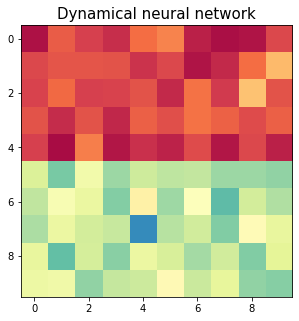

In [661]:
# Animation data
X = x.reshape(nx,ny,T)
Xmin = X.min()
Xmax = X.max()

# Initialization
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(X[:,:,0], cmap='Spectral_r', vmin = Xmin, vmax=Xmax)
plt.title('Dynamical neural network', fontsize=15)

# Update function
def animate(i):
    im.set_array(X[:,:,i])
    return [im]

# Animation
anim = animation.FuncAnimation(fig, animate, repeat=True, frames=range(1,T-1000,20))

rc('animation', html='html5')
anim.save('figures/dynamical_neural_network.gif', fps=20, dpi=300)
anim

In [668]:
from PIL import Image
import os
cwd = os.getcwd()

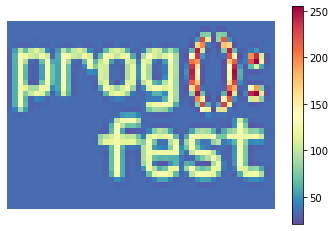

In [719]:
image = Image.open(cwd + '/figures/progfest.png')
image = image.convert('L')
image = image.resize((50,35))# 100,71
im = np.asarray(image)
im = im.astype('double')
plt.imshow(im, cmap='Spectral_r')
plt.axis('off')
plt.colorbar()
plt.show()

In [720]:
im.flatten().shape

(1750,)

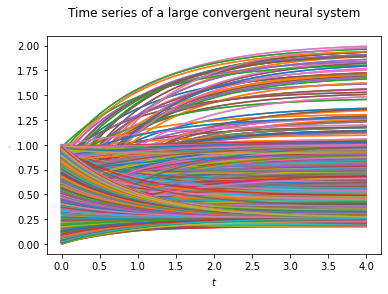

In [734]:
n0 = 35
n1 = 50
n = n0*n1
x_0 = np.random.rand(n,1)
u = im.flatten().reshape(n,1)
u = u/u.max()
A = 1/np.sqrt(8*n)*u @ u.T
b = 0.0*np.random.rand(n,1)
dt = 0.001

t,x = euler_integrate(neural_network2, x_0, t_span = [0,4], delta_t = dt, args = (A,b))

fig, ax = plt.subplots()
ax.plot(t,x.T)
ax.set_xlabel('$t$', fontsize=10)
ax.set_ylabel('$x(t)$', fontsize=1)
ax.plot(t,x.T, alpha = 0.8)
ax.set_title('Time series of a large convergent neural system', fontsize=12, pad=20)
plt.show()

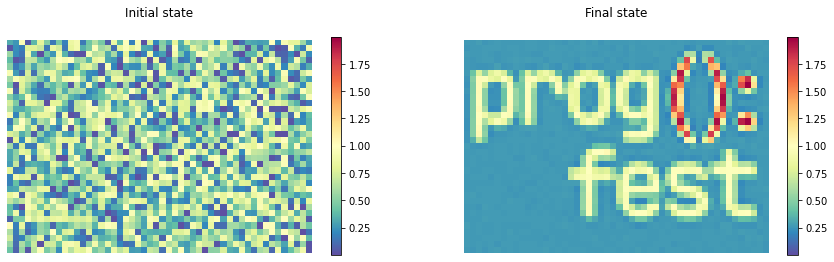

In [739]:
T = len(t)
X = x.reshape(n0,n1,T)
Xmin = X.min()
Xmax = X.max()

fig, ax = plt.subplots(1,2,figsize=(15,5))
im0 = ax[0].matshow(X[:,:,0], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[0].axis('off')
ax[0].set_title('Initial state', fontsize=12)
cbar = fig.colorbar(im0, ax=ax[0], shrink=0.8)

im1 = ax[1].matshow(X[:,:,-1], vmin = Xmin, vmax=Xmax, cmap='Spectral_r')
ax[1].axis('off')
ax[1].set_title('Final state', fontsize=12)
cbar = fig.colorbar(im1, ax=ax[1], shrink=0.8)
plt.show()

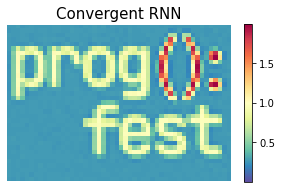

In [743]:
# Animation data
X = x.reshape(n0,n1,T)
Xmin = X.min()
Xmax = X.max()

# Initialization
fig, ax = plt.subplots(figsize=(5,5))
ax.axis('off')
im = ax.imshow(X[:,:,0], cmap='Spectral_r', vmin = Xmin, vmax=Xmax)
cbar = fig.colorbar(im, ax=ax, shrink=0.58)
plt.title('Convergent RNN', fontsize=15)

# Update function
def animate(i):
    im.set_array(X[:,:,i])
    return [im]

# Animation
anim = animation.FuncAnimation(fig, animate, repeat=True, frames=range(1,T,40))

rc('animation', html='html5')
anim.save('figures/progfest_RNN.gif', fps=10, dpi=300)
anim

In [ ]:
def euler_integrate(vector_field, initial_state, t_span = [0,1], delta_t = 0.01, args=()):
    nb_time_steps = int( (t_span[1]-t_span[0])/delta_t+1) 
    times = [ t_span[0] + k*delta_t for k in range(nb_time_steps) ]
    states = [initial_state]
    for time_step in range(nb_time_steps-1):
        t = times[time_step]
        actual_state = states[time_step]
        new_state = actual_state + delta_t * field(t, actual_state, *args)
        states.append(new_state)
    return times, states

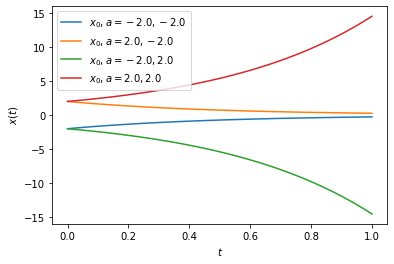

In [128]:
legend = []
for a in [-2,2]:
    for x_0 in [-2,2]:
        t,x = euler_integrate_1d(linear_field, x_0, t_span = [0,1], delta_t = 0.01, args = (a,))
        plt.plot(t,x)
        plt.xlabel('$t$')
        plt.ylabel('$x(t)$')
        legend.append('$x_0, a = %1.1f, %1.1f$' %(x_0,a))
plt.legend(legend)
plt.show()

In [63]:
def euler_integrate(vector_field, initial_state, t_span = [0,4], delta_t = 0.01, args=None):
    times = np.arange(t_span[0], t_span[1]+delta_t, delta_t) #other option np.linspace(t_span[0], t_span[1], int( (t_span[1]-t_span[0])/delta_t+1) )
    states = np.zeros((len(initial_state),len(time_steps)))
    states[:,0] = initial_state
    for step in range(len(times)):
        states[:,step+1] += delta_t*vector_field(states[:,step],*args)
    return state

In [64]:
def affine_field(x,a=1,b=1):
    return a*x+b
    

In [65]:
affine_field(1,*(0,3))

3

In [67]:
euler_integrate(affine_field,,args=(2,3))

TypeError: object of type 'int' has no len()

In [60]:
[*(2,1)]

[2, 1]